In [100]:
import matplotlib.pyplot as plt
import numpy as  np
import xarray as xr

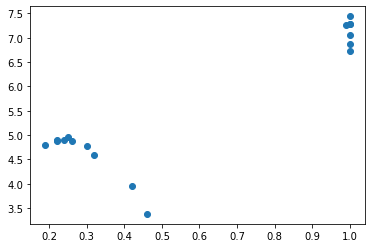

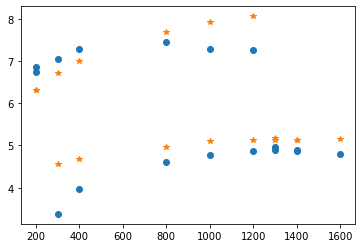

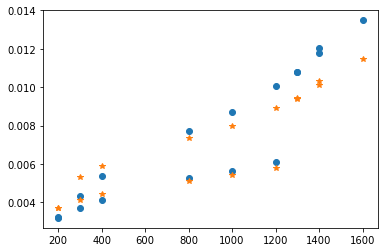

In [99]:
co2 = np.array([200,300,400,800,1000,1200,1300,1400,1600,200,300,400,800,1000,1200,1300,1400])
cf = np.array([1.00,1.00,1.00,1.00,1.00,0.99,0.25,0.22,0.19,1.00,0.46,0.42,0.32,0.30,0.26,0.24,0.22])
sst = np.array([287.7,289.1,290.0,292.2,293.2,294.3,304.5,305.8,308.0,287.6,296.8,297.9,300.9,302.0,303.7,304.7,306.2])
Tj = np.array([6.73,7.05,7.29,7.44,7.29,7.25,4.96,4.90,4.79,6.86,3.38,3.96,4.60,4.78,4.87,4.89,4.87]) # K
qj = np.array([3.19,3.70,4.14,5.27,5.63,6.09,10.80,11.77,13.49,3.24,4.31,5.36,7.71,8.73,10.05,10.81,12.04])*1e-3 # kg/kg

# sort = np.argsort(co2)
# co2 = co2[sort]
# cf = cf[sort]
# sst = sst[sort]
# Tj = Tj[sort]
# qj = qj[sort]

Cp = 1004.0
sj = Cp*Tj

plt.plot(cf, Tj, 'o')
plt.show()

plt.plot(co2, Tj, 'o')
plt.plot(co2, 7 + 1*np.log(co2/400) - 4*(1-cf), '*')
# from scipy.optimize import curve_fit
# def fit(x,a,b,c):
#     return a + np.log(co2/400)*b + (1-cf)*c
# pfit, pcov = curve_fit(fit, co2, Tj, [7, 1, -4])
# print(pfit)
# Tj_fit = fit(co2, *pfit)
# plt.plot(co2, Tj_fit, '*')

plt.show()

e0 = 611.0
L0 = 2.5e6
Rv = 461.0
T0 = 273.15
Rd = 287.0
psurf = 1e5
g = 9.8
# Cp = 1004
# Cpv = 1859

def pres(z, T):
    return psurf * np.exp((-g * z) / (Rd * T))

def q_sat(z, T):
    psat = e0 * np.exp(-L0/Rv * (1 / T - 1/T0))
    return Rd/Rv * psat / (pres(z,T) - psat)

plt.plot(co2, qj, 'o')
plt.plot(co2, 0.2*q_sat(1000, sst+Tj), '*')
plt.show()


[10051.39210848   404.81418053  3024.85246107]


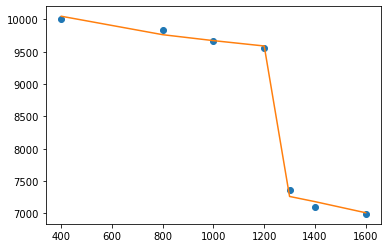

[-0.00468956  0.00172823  0.01020646]


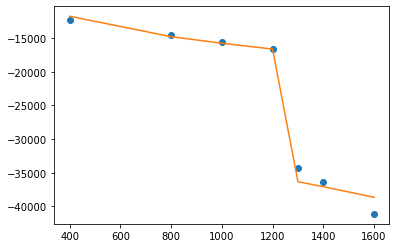

In [101]:
ds = xr.open_dataset('experiments/data/LES_steadystate_all_upsteps.nc')
co2 = ds["CO2"].values
sst = ds["sst"].values
qtp = ds["qt_plus"].values
qM = ds["qtM"].values
hp = ds["h_plus"].values
hM = ds["hM"].values
cf = ds["cf"].values

Lv = 2.5e6

qj = qtp - qM
hj = hp - hM
sj = hj - Lv*qj

plt.plot(co2, sj, 'o')
# fit = (-6.07 + 2.5*2.19) * co2 + (157.0 + 2.5e3*4.04) * np.minimum(1, cf*3)
# fit = 10255 - np.log(co2/400)*500 - (1 - cf)*2800
from scipy.optimize import curve_fit
def fit_s(x,a,b,c):
    return a - np.log(co2/400)*b - (1-cf)*c
pfit, pcov = curve_fit(fit_s, co2, sj, [10000, 500, 2500])
print(pfit)
sj_fit = fit_s(co2, *pfit)
plt.plot(co2, sj_fit, '-')
plt.show()

plt.plot(co2, Lv*qj, 'o')
def fit_q(x,a,b,c):
    return a - np.log(co2/400)*b - (1-cf)*c
pfit, pcov = curve_fit(fit_q, co2, qj, [-0.004, 0.001, 0.01])
print(pfit)
qj_fit = fit_q(co2, *pfit)
plt.plot(co2, Lv*qj_fit, '-')
plt.show()

# EIS = (hj - 2.5e6*qj) / 1004.0
# plt.plot(co2, EIS, 'o')
# EISx = (10.5 - 0.5*np.log(co2/400)) - (0.5/cf)
# plt.plot(co2, EISx, '.-')
# plt.show()

[0.99905735 0.99745619 0.99695163 0.99396724 0.23519038 0.21865234
 0.1796554 ]
[0.8 0.8 0.8 0.8 0.1 0.1 0.1]


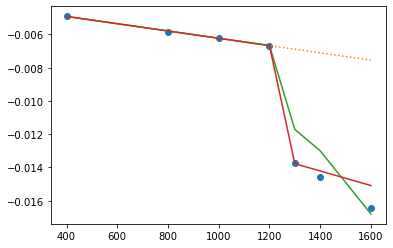

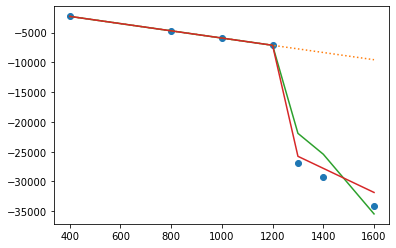

In [118]:
ds = xr.open_dataset('experiments/data/LES_steadystate_all_upsteps.nc')
co2 = ds["CO2"].values
sst = ds["sst"].values
qtp = ds["qt_plus"].values
qM = ds["qtM"].values
hp = ds["h_plus"].values
hM = ds["hM"].values
cf = ds["cf"].values
newcf = np.round(cf)*0.7+0.1
print(cf)
print(newcf)

qj = qtp - qM
hj = hp - hM

# plt.plot(co2, cf, 'o')
# plt.show()

plt.plot(co2, qj, 'o')
fit = (-2.19e-6 * co2 - 4.04e-3)
plt.plot(co2, fit, ':')
x = np.minimum(cf*2.5, 1)
newx = np.maximum(np.minimum(newcf*5, 1), 0.5)
plt.plot(co2, fit/x, '-')
plt.plot(co2, fit/newx, '-')
plt.show()

plt.plot(co2, hj, 'o')
fit = (-6.07 * co2 + 157.0)
plt.plot(co2, fit, ':')
x = np.minimum(cf*1.5, 1)
newx = np.maximum(np.minimum(newcf*3, 1), 0.3)
plt.plot(co2, fit/x, '-')
plt.plot(co2, fit/newx, '-')
plt.show()

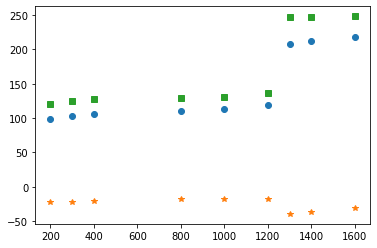

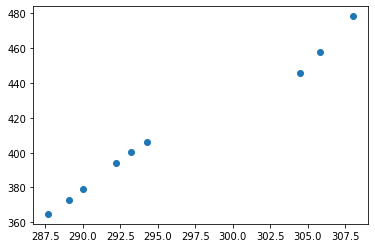

In [140]:
co2 = np.array([200,300,400,800,1000,1200,1300,1400,1600])
sst = np.array([287.7,289.1,290.0,292.2,293.2,294.3,304.5,305.8,308.0])
lwup = np.array([387.5,394.7,399.8,412.5,418.0,424.3,485.2,494.1,508.9])
lwdn = np.array([364.8,372.9,379.1,394.2,400.4,406.4,445.7,457.9,478.4])
swup = np.array([13.4,13.9,14.1,14.4,14.5,15.1,27.5,27.5,27.6])
swdn = np.array([134.1,139.4,141.4,143.5,145.4,151.4,274.9,275.4,275.9])
lwnet = lwdn - lwup
swnet = swdn - swup
rad = swnet + lwnet

plt.plot(co2, rad, 'o')
plt.plot(co2, lwnet, '*')
plt.plot(co2, swnet, 's')
plt.show()

plt.plot(sst, lwdn, 'o')

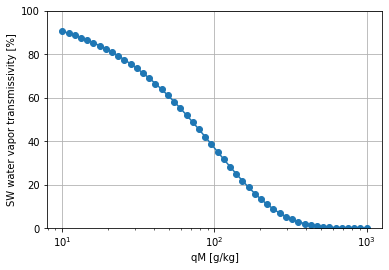

In [137]:
qM = np.geomspace(10,1000)*1e-3
WVtrans = 1/np.exp(10*qM)
plt.plot(qM*1e3, WVtrans*100,'o-')
plt.xscale('log')
plt.xlabel("qM [g/kg]")
plt.ylabel("SW water vapor transmissivity [%]")
plt.ylim([0,100])
plt.grid()
plt.show()

Frozen({'cf': <xarray.Variable (CO2: 6)>
array([0.999057, 0.997456, 0.996952, 0.993967, 0.23519 , 0.179655]), 'sst': <xarray.Variable (CO2: 6)>
array([289.976651, 292.224879, 293.133337, 294.227751, 304.695563, 308.049147]), 'lhf': <xarray.Variable (CO2: 6)>
array([106.973541, 112.922026, 114.435664, 119.582305, 209.571732, 221.313677]), 'shf': <xarray.Variable (CO2: 6)>
array([ 2.293973,  1.279351,  0.745877,  0.453127,  2.23303 , -0.141107]), 'ohu': <xarray.Variable (CO2: 6)>
array([-3., -3., -3., -3., -3., -3.]), 'zi': <xarray.Variable (CO2: 6)>
array([1265.791667, 1077.083333, 1007.208333,  967.916667,  825.729167,
        706.145833]), 'zi_plus': <xarray.Variable (CO2: 6)>
array([1275., 1085., 1015.,  975.,  835.,  715.]), 'zi_minus': <xarray.Variable (CO2: 6)>
array([1265., 1075., 1005.,  965.,  825.,  705.]), 'zb': <xarray.Variable (CO2: 6)>
array([943.645833, 770.270833, 710.666667, 681.791667, 538.125   , 501.568421]), 'lwp': <xarray.Variable (CO2: 6)>
array([0.051861, 0.05007

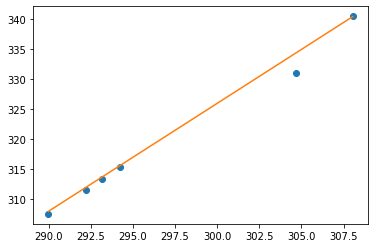

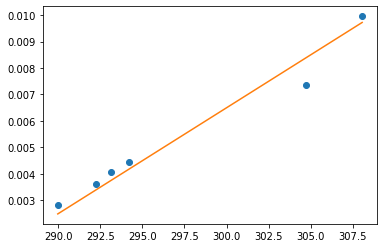

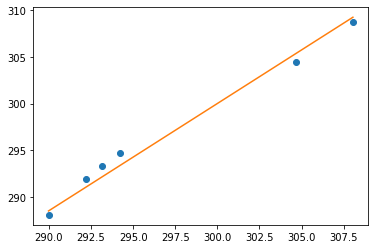

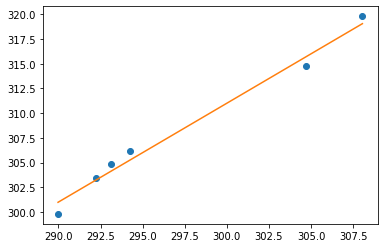

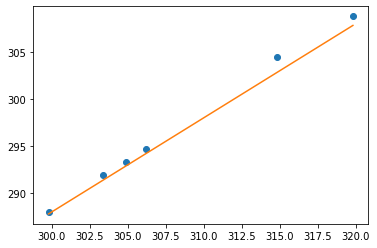

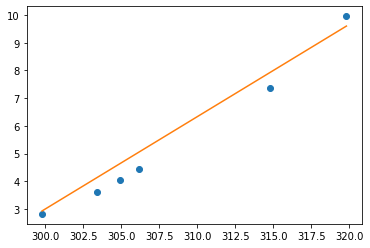

In [136]:
ds = xr.open_dataset('experiments/data/LES_steadystate_all_upsteps.nc')
print(ds.variables)
co2 = ds["CO2"].values
sst = ds["sst"].values
qtp = ds["qt_plus"].values
hp = ds["h_plus"].values
zi_plus = ds["zi_plus"].values
g = 9.8
L0 = 2.5e6
Cp = 1004.0
Tp = (hp - g*zi_plus - L0*qtp) / Cp
print(Tp)
tropsst = np.array([299.8,303.4,304.9,306.2,314.8,319.8])

print(co2)
plt.plot(sst, hp/Cp, 'o')
plt.plot(sst, (sst-290)*1.8+308, '-')
plt.show()

plt.plot(sst, qtp, 'o')
plt.plot(sst, (sst-290)*4e-4+2.5e-3, '-')
plt.show()

plt.plot(sst, Tp, 'o')
plt.plot(sst, (sst-300)*1.15+300, '-')
plt.show()

plt.plot(sst, tropsst, 'o')
plt.plot(sst, sst+11, '-')
plt.show()

plt.plot(tropsst, Tp, 'o')
plt.plot(tropsst, tropsst-12, '-')
plt.show()

plt.plot(tropsst, qtp*1e3, 'o')
plt.plot(tropsst, (tropsst-300)/3 + 3, '-')
plt.show()

In [101]:
co2 = np.array([200,300,400,800,1000,1200,1300,1400,1600])
dqt = np.array([3.19,3.70,4.14,5.27,5.63,6.09,10.80,11.77,13.49])
dT = np.array([6.73,7.05,7.29,7.44,7.29,7.25,4.96,4.90,4.79])
sst = np.array([287.7,289.1,290.0,292.2,293.2,294.3,304.5,305.8,308.0])
trop_sst = np.array([296.7,298.4,299.8,303.4,304.9,306.2,314.8,316.8,319.8])

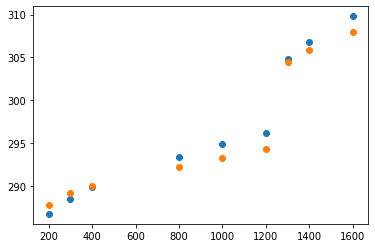

In [104]:
plt.plot(co2, trop_sst-10, 'o')
plt.plot(co2, sst, 'o')
plt.show()

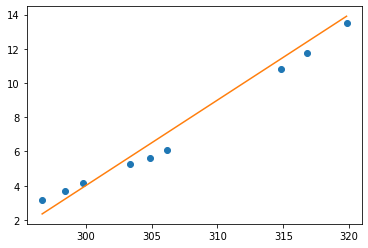

In [11]:
plt.plot(trop_sst, dqt, 'o')
plt.plot(trop_sst, 4 + (trop_sst - 300)/2, '-')
plt.show()